In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math 

In [34]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
    
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        #alternatively: self.w = np.linalg.inv(x.T @ x)@x.T@y
        self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
        return self
    
    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh

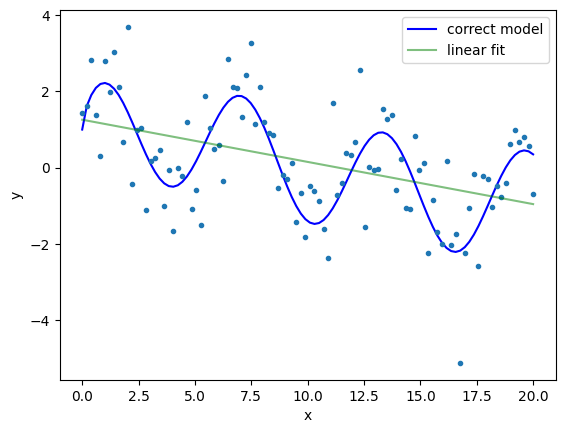

In [36]:
# Generating data
N = 100
x = np.linspace(0,20, N)
yt = np.sin(np.sqrt(x)) + np.cos(x) + np.sin(x)
plt.plot(x, yt, 'b-', label='correct model')                       
y = yt + np.random.normal(0, 1, 100)              
plt.plot(x, y, '.')

# create model
model = LinearRegression()
yh = model.fit(x,y).predict(x)


# plot the graph
plt.plot(x, yh, 'g-', alpha=.5, label='linear fit')
plt.xlabel('x')
plt.ylabel(r'y')
plt.legend()
plt.show()

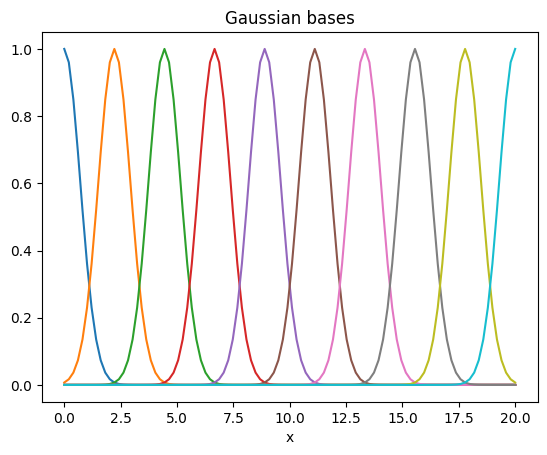

In [56]:
D=10
gaussian = lambda x,mu,sigma: np.exp(-((x-mu)/sigma)**2)          #non-linear feature function
mu = np.linspace(0,20,D)                                          #different mean values for the non-linear features
phi = gaussian(x[:,None], mu[None,:],1)                           #gives a new set of features of the existing data
for d in range(D):
    plt.plot(x, phi[:,d], '-')
plt.xlabel('x')
plt.title('Gaussian bases')
plt.show()

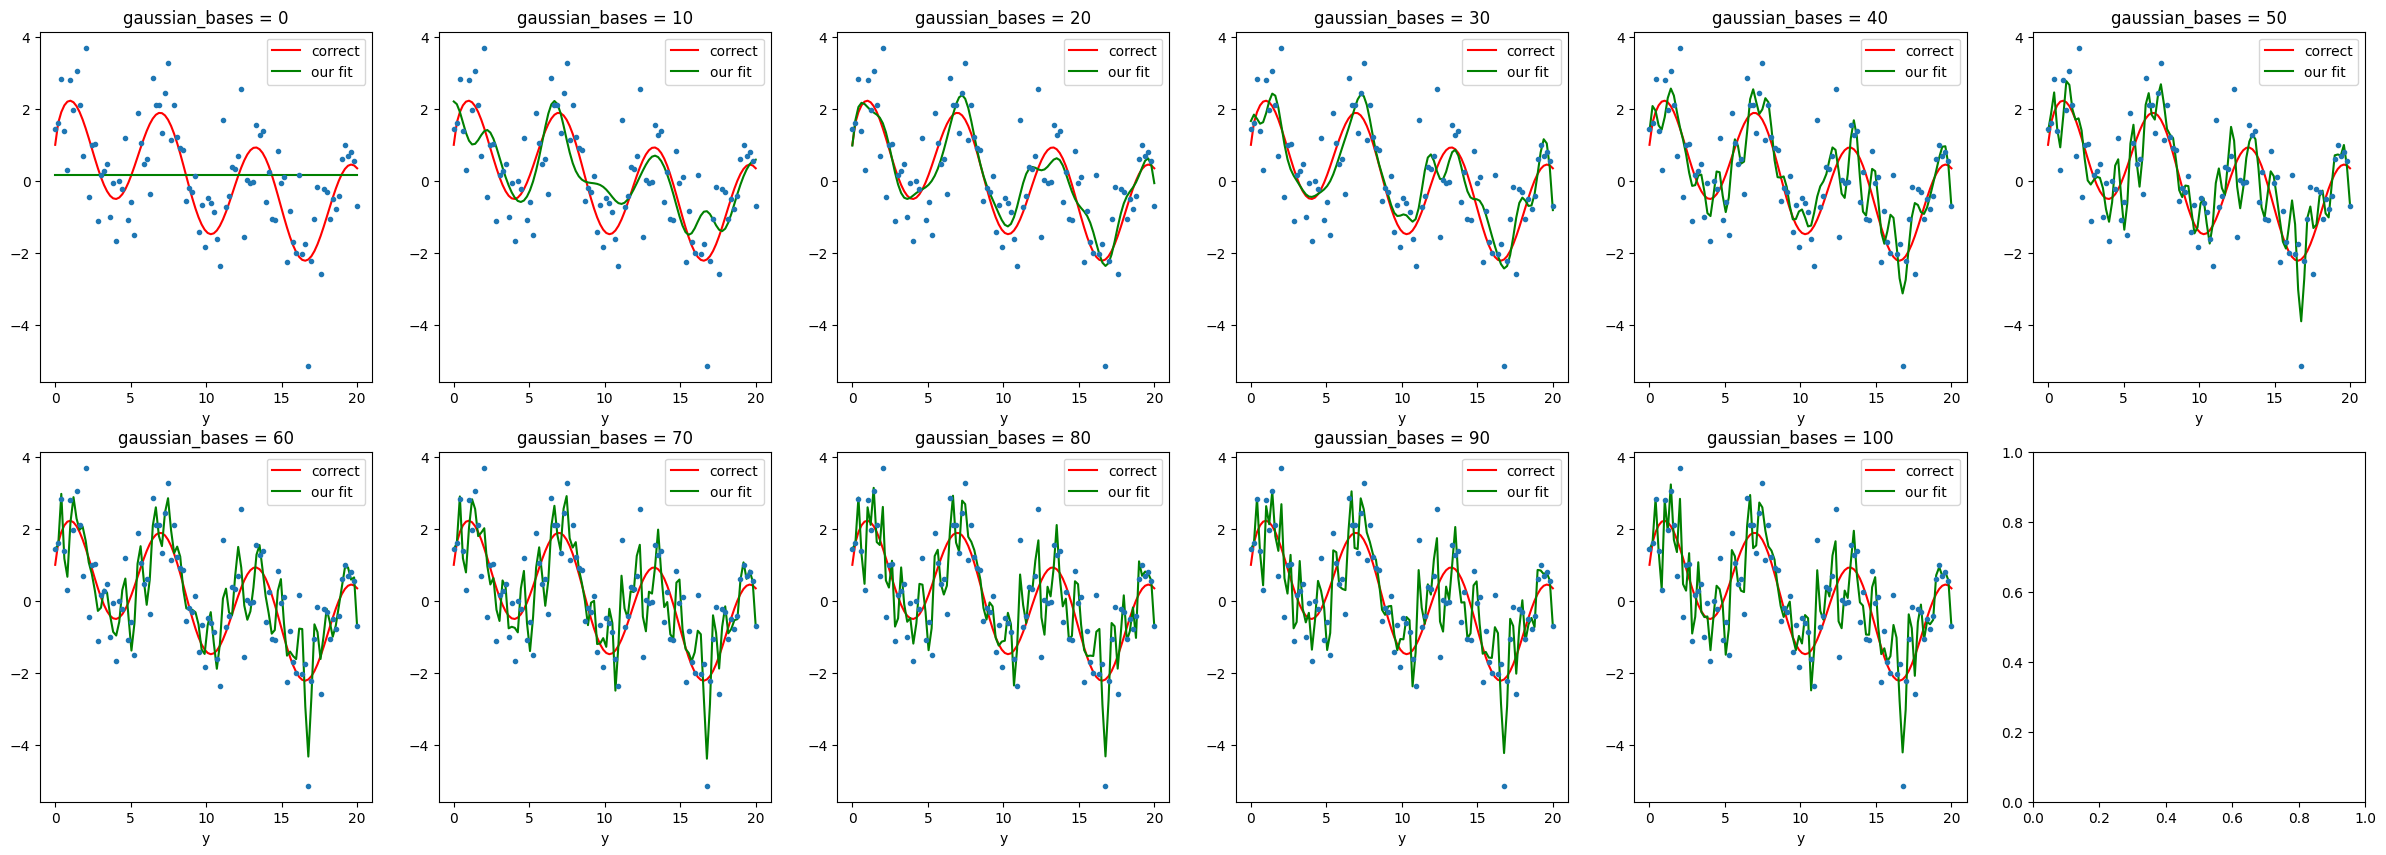

In [75]:
fig, ax = plt.subplots(2,6,figsize=(30,10))


gaussian = lambda x,mu,sigma: np.exp(-((x-mu)/sigma)**2)         

ax = ax.flatten()
num_gaussian_bases = [0,10,20,30,40,50,60,70,80,90,100]
for i in range(11):
    gaussian_bases = num_gaussian_bases[i]
    mu = np.linspace(0,20,gaussian_bases) 
    phi = gaussian(x[:,None], mu[None,:],1)
    yh = model.fit(phi,y).predict(phi)
    ax[i].plot(x, yt, 'r-', label='correct')      
    ax[i].plot(x, yh, 'g-', label='our fit')
    ax[i].plot(x, y, '.')
    ax[i].set_xlabel('x')
    ax[i].set_xlabel('y')
    ax[i].set_title(f'gaussian_bases = {gaussian_bases}')
    ax[i].legend()

    
